## Create a Neural Network **FOR TWO HIDDEN LAYERS**

**Imports:**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
%matplotlib inline
from keras.datasets import mnist
from google.colab import drive

#**Creating the Generic Algorithm to be fit with all datasets!**

<br> **This works for 2 Hidden Layers**

First,
Randomizing the initial parameters for the **Forward Propagation** <br>
This function takes the Shape of the dataset used to get the random suitable sized initial vectors.

In [ ]:
def initialRandomParams(N_neuros,NofLabels,Xshape):
#This limit is to make the random number generated from following lines is between -0.5 and 0.5 not 0,1.
    limit = 0.5;
    W1 = np.random.rand(N_neuros, Xshape[0]) - limit; #for first hidden layer
    b1 = np.random.rand(N_neuros, 1) - limit;
    W2 = np.random.rand(N_neuros, N_neuros) - limit
    b2 = np.random.rand(N_neuros, 1) - limit
    W3 = np.random.rand(NofLabels,N_neuros) - limit; #for the output layer
    b3 = np.random.rand(NofLabels, 1) - limit;
    return W1, b1, W2, b2, W3, b3

**The Activation Function** <br>
The first activation function: <br>
It returns 0 if the number is negative and the number it's positive.

In [ ]:
def ThresholdofZero(Z):
    return np.maximum(Z, 0)

**The Second activation function (For the second layer):** <br>
The softmax of Z

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

**The Forward Propagation Function**:<br>
This happens only on the begining of algorithm to predict all wights based on the randomaized initial weights 

In [ ]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Output1 = W1.dot(X) + b1
    Z1 = ThresholdofZero(Output1)
    Output2 = W2.dot(Z1) + b2
    Z2 = ThresholdofZero(Output2)
    Output3 = W3.dot(Z2) + b3
    Z3 = softmax(Output3)
    return Output1, Z1, Output2, Z2, Output3, Z3

**The ifPositive returns if the argument positive or not!**

In [ ]:
def ifPositive(Z):
    return Z > 0

**The One Hot of vector returns the matrix where each column representing the zreos except if for the highest value**

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

**The Backward Propagation Function:** <br>
<br>
This applies to all steps coming after the forward propagation to reach the lowest error.
<br> **This works for 2 Hidden Layers**

In [ ]:
def backward_prop(Output1, Z1, Output2, Z2, Output3, Z3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = Z3 - one_hot_Y
    dW3 = (1 / m) * dZ3.dot(Output2.T)
    db3 = (1 / m) * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ifPositive(Output2)
    dW2 = (1 / m) * dZ2.dot(Output2.T)
    db2 = (1 / m) * np.sum(dZ2)    
    dZ1 = W2.T.dot(dZ2) * ifPositive(Output1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

**Update wieghts to reach Lower Error (Higher Accuracy)**



In [ ]:
def Update_Wieghts(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, LearningRate):
    W1 = W1 - LearningRate * dW1
    b1 = b1 - LearningRate * db1    
    W2 = W2 - LearningRate * dW2  
    b2 = b2 - LearningRate * db2   
    W3 = W3 - LearningRate * dW3  
    b3 = b3 - LearningRate * db3      
    return W1, b1, W2, b2, W3, b3

**For Testing the model on different datasets** <br>
- We get the predicted output.
- Then, calculate the accuracy.

In [ ]:
def get_predictions(O2):   # Return the index of the maximum value.
    return np.argmax(O2, 0)

def get_accuracy(predictions, Y):  # Return the accuracy
    print(predictions, Y)
    return 100*np.sum(predictions == Y) / Y.size


**The Gradient Descent Function:**
<br>
To combine all previous function together according to the algorithm of gradient_descent: <br>


1.   Initialize Random Wieghts.
2.   Go in forward propagation to calculate initial ouput and error.
3.   Go in backward prppagation to update wieghts.
4.   Update weights to reach more accuracy and lower error.



In [ ]:
def gradient_descent(X, Y, LearningRate, iterations, Xshape, NofLabels, N_neuros):
    W1, b1, W2, b2, W3, b3 = initialRandomParams(N_neuros,NofLabels,Xshape)  # Initialize Random Wieghts.
    for i in range(iterations):
        Output1, Z1, Output2, Z2, Output3, Z3, = forward_prop(W1, b1, W2, b2, W3, b3, X) #Go in forward propagation to calculate initial ouput and error.
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Output1, Z1,Output2, Z2,Output3, Z3, W1, W2, W3, X, Y) #Go in backward prppagation to update wieghts.
        W1, b1, W2, b2, W3, b3 = Update_Wieghts(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, LearningRate) #Update weights to reach more accuracy and lower error.
        #Just
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(Z3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

## Test your model on IRIS  dataset and MNIST Dataset

**Load Datasets** 

In [ ]:
drive.mount('/content/drive')
mnist = pd.read_csv ("/content/drive/MyDrive/ML_Project1/MNIST.csv")
iris = pd.read_csv ("/content/drive/MyDrive/ML_Project1/iris.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**For MNIST Dataset:** 
<br> <br> Data Preparation:

In [ ]:
data = np.array(mnist)
m, n = data.shape
np.random.shuffle(data) # shuffling data before spliting it.
maxPixelValue = 255.0;
data_development = data[0:1000].T # the first 1000 rows for the development data.
Y_development = data_development[0] # the first column for the label.
X_development = data_development[1:n] # Remaining columns for features
X_development = X_development / maxPixelValue # To make all pixel values floats to get into the softmax.

data_train = data[1000:m].T # The remaining rows for training
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / maxPixelValue;
m_train = X_train.shape[1]; #Number of columns (Features || Pixels)

In [ ]:
X_train.shape

(784, 41000)

**Training Process** 

In [ ]:
3LearningRate = 0.008;
NumberofIterations = 1500;
NofLabels = 10;
N_neuros = 20; # Number of neuros per each layer
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, LearningRate, NumberofIterations,X_train.shape,NofLabels, N_neuros);

Iteration:  0
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
7.617073170731707
Iteration:  10
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
8.453658536585365
Iteration:  20
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
9.373170731707317
Iteration:  30
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
10.28048780487805
Iteration:  40
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
11.06829268292683
Iteration:  50
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
12.036585365853659
Iteration:  60
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
12.909756097560976
Iteration:  70
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
13.714634146341464
Iteration:  80
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
14.526829268292683
Iteration:  90
[4 7 7 ... 3 3 4] [4 8 4 ... 5 4 8]
15.263414634146342
Iteration:  100
[4 7 7 ... 3 3 1] [4 8 4 ... 5 4 8]
15.980487804878049
Iteration:  110
[4 7 7 ... 3 3 1] [4 8 4 ... 5 4 8]
16.65609756097561
Iteration:  120
[4 7 7 ... 3 3 1] [4 8 4 ... 5 4 8]
17.31219512195122
Iteration:  130
[4 7 7 ... 3 3 1] [4 8 4 ... 5 4 8]
17.929268292682927
Iteration:  140
[4 7 7 .

#**Testing Process for MNIST** 
<br>
<br>
This function (Make Prediction) is to make prediction based on a special X by appling forward propagation to get a vevtor of Ys and got the heighest value in this vevtor on the a special index; to make this index the predicted value!

**Test Prediction**
  
To chech how accurate this prediction!


In [ ]:
def Predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _,Z3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(Z3)
    return predictions

def test(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = Predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)   
    current_image = current_image.reshape((28, 28)) * 255 # To convert to image
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Get the prediction of any image index.

Prediction:  [1]
Label:  1


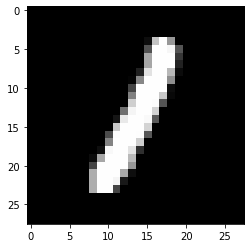

In [ ]:
IndexPrdicted = 9
test(IndexPrdicted, W1, b1, W2, b2, W3, b3)

**Making the predictions on the Develoment Vector**

In [ ]:
dev_predictions = Predictions(X_development, W1, b1, W2, b2, W3, b3);
get_accuracy(dev_predictions, Y_development)

[6 1 6 4 3 0 7 3 0 3 1 3 2 0 7 9 1 6 6 3 1 9 6 9 6 4 8 9 9 8 4 5 7 0 9 5 5
 1 6 5 2 5 7 0 3 5 6 5 9 8 0 1 9 0 4 9 6 7 8 2 6 2 6 5 1 2 5 8 4 2 7 0 1 4
 1 3 1 1 6 9 3 6 3 2 1 1 1 1 2 2 4 0 9 4 1 4 0 8 4 0 0 1 4 8 6 1 6 9 2 6 9
 4 4 0 1 8 2 1 1 3 1 1 7 3 2 6 0 1 1 6 8 4 4 0 2 8 9 3 0 9 0 0 6 8 3 0 9 7
 2 6 1 7 0 1 0 0 8 6 4 2 3 1 4 8 9 2 5 7 1 0 1 0 1 1 6 0 9 8 0 7 8 4 6 3 4
 1 2 3 4 0 3 0 3 6 4 6 3 0 3 7 3 8 2 0 1 1 0 1 3 7 0 9 3 5 2 6 0 4 4 9 0 8
 1 6 6 9 0 2 1 2 5 8 0 8 2 1 2 0 1 4 4 1 9 4 0 0 3 0 8 9 0 9 1 7 5 7 4 4 1
 0 2 4 9 8 6 9 8 9 2 8 6 9 0 0 6 8 7 7 1 0 3 5 6 6 7 9 9 6 6 3 6 6 2 7 1 2
 2 1 0 1 0 2 9 4 3 1 3 0 2 0 3 4 6 2 9 9 3 4 6 4 7 2 3 6 0 7 7 5 9 6 5 1 1
 0 5 1 6 5 4 9 3 6 8 4 9 9 0 2 0 6 2 6 6 8 0 3 0 3 0 7 6 5 1 4 0 8 0 9 4 8
 0 3 9 7 4 8 2 3 9 6 5 4 6 8 5 0 3 8 8 1 7 9 4 9 4 5 3 6 2 8 3 6 4 3 6 1 3
 7 6 1 9 2 7 6 9 0 1 7 9 4 1 5 4 9 8 4 6 0 6 8 7 4 0 9 7 9 2 4 4 6 8 4 5 0
 3 7 8 7 0 7 0 9 0 4 6 1 0 2 8 7 6 4 7 8 3 1 3 0 1 6 4 5 0 6 4 1 3 9 0 0 4
 3 2 8 6 6 5 9 4 7 4 2 7 

65.0

#**For IRIS Dataset:**
 <br> **Data Preparation:**

In [ ]:
data = np.array(iris)
m, n = data.shape
np.random.shuffle(data) # shuffling data before spliting it.
maxPixelValue = 7.9;
data_development = data[0:50].T # the first 50 rows for the development data.
Y_development = data_development[0] # the first column for the label.
Y_development = Y_development.astype(int)
X_development = data_development[1:n] # Remaining columns for features
X_development = X_development.astype(int)
X_development = X_development / maxPixelValue # To make all pixel values floats to get into the softmax.

data_train = data[50:m].T # The remaining rows for training
Y_train = data_train[0]
Y_train = Y_train.astype(int)
X_train = data_train[1:n]
X_train = X_train.astype(int)
X_train = X_train / maxPixelValue;
m_train = X_train.shape[1]; #Number of columns (Features || Pixels)

**Training Process** 

In [ ]:
LearningRate = 0.05;
NumberofIterations = 1000;
NofLabels = 3;
N_neuros = 20; # Number of neuros per each layer
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, LearningRate, NumberofIterations,X_train.shape, NofLabels, N_neuros)

Iteration:  0
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] [2 2 2 0 1 1 1 0 0 2 2 0 0 2 0 0 1 2 1 1 0 1 2 0 0 2 0 1 2 2 0 2 2 0 2 1 1
 1 2 1 1 2 1 0 0 1 2 1 1 1 1 1 0 1 0 0 0 0 1 2 1 1 1 2 0 2 0 1 1 1 0 0 0 1
 1 2 2 2 1 0 0 0 1 2 2 0 2 2 0 1 2 0 0 0 1 1 0 2 2 2]
31.0
Iteration:  10
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] [2 2 2 0 1 1 1 0 0 2 2 0 0 2 0 0 1 2 1 1 0 1 2 0 0 2 0 1 2 2 0 2 2 0 2 1 1
 1 2 1 1 2 1 0 0 1 2 1 1 1 1 1 0 1 0 0 0 0 1 2 1 1 1 2 0 2 0 1 1 1 0 0 0 1
 1 2 2 2 1 0 0 0 1 2 2 0 2 2 0 1 2 0 0 0 1 1 0 2 2 2]
31.0
Iteration:  20
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

#**Testing Process for IRIS** 


In [ ]:
dev_predictions = Predictions(X_development, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_development)

[1 0 0 0 0 2 1 0 0 2 2 0 1 1 1 1 2 2 2 1 2 0 0 2 0 1 0 2 1 2 2 1 0 1 1 1 2
 2 2 1 0 2 0 0 2 2 1 1 0 1] [1 0 0 0 0 2 1 0 0 2 2 0 1 1 1 1 2 2 2 1 1 0 0 2 0 1 0 2 1 2 2 2 0 1 1 1 2
 2 2 2 0 2 0 0 2 2 1 1 0 2]


92.0